# 课程： Python分析工业大数据

## 第六章 可视化  

## 颜色的设置

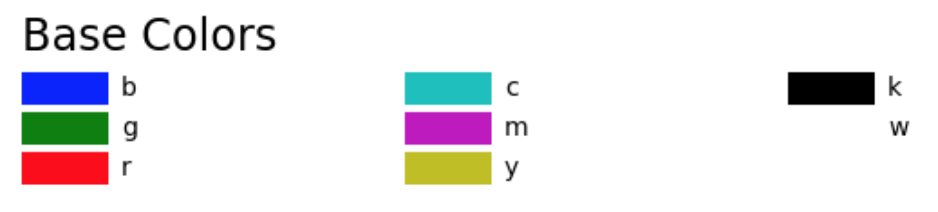
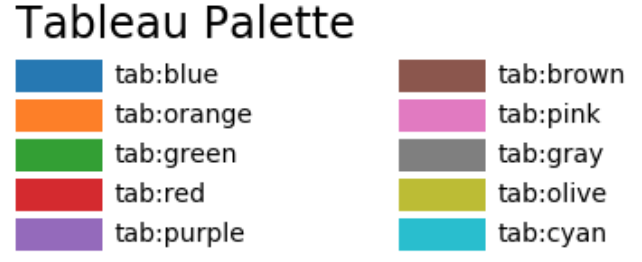
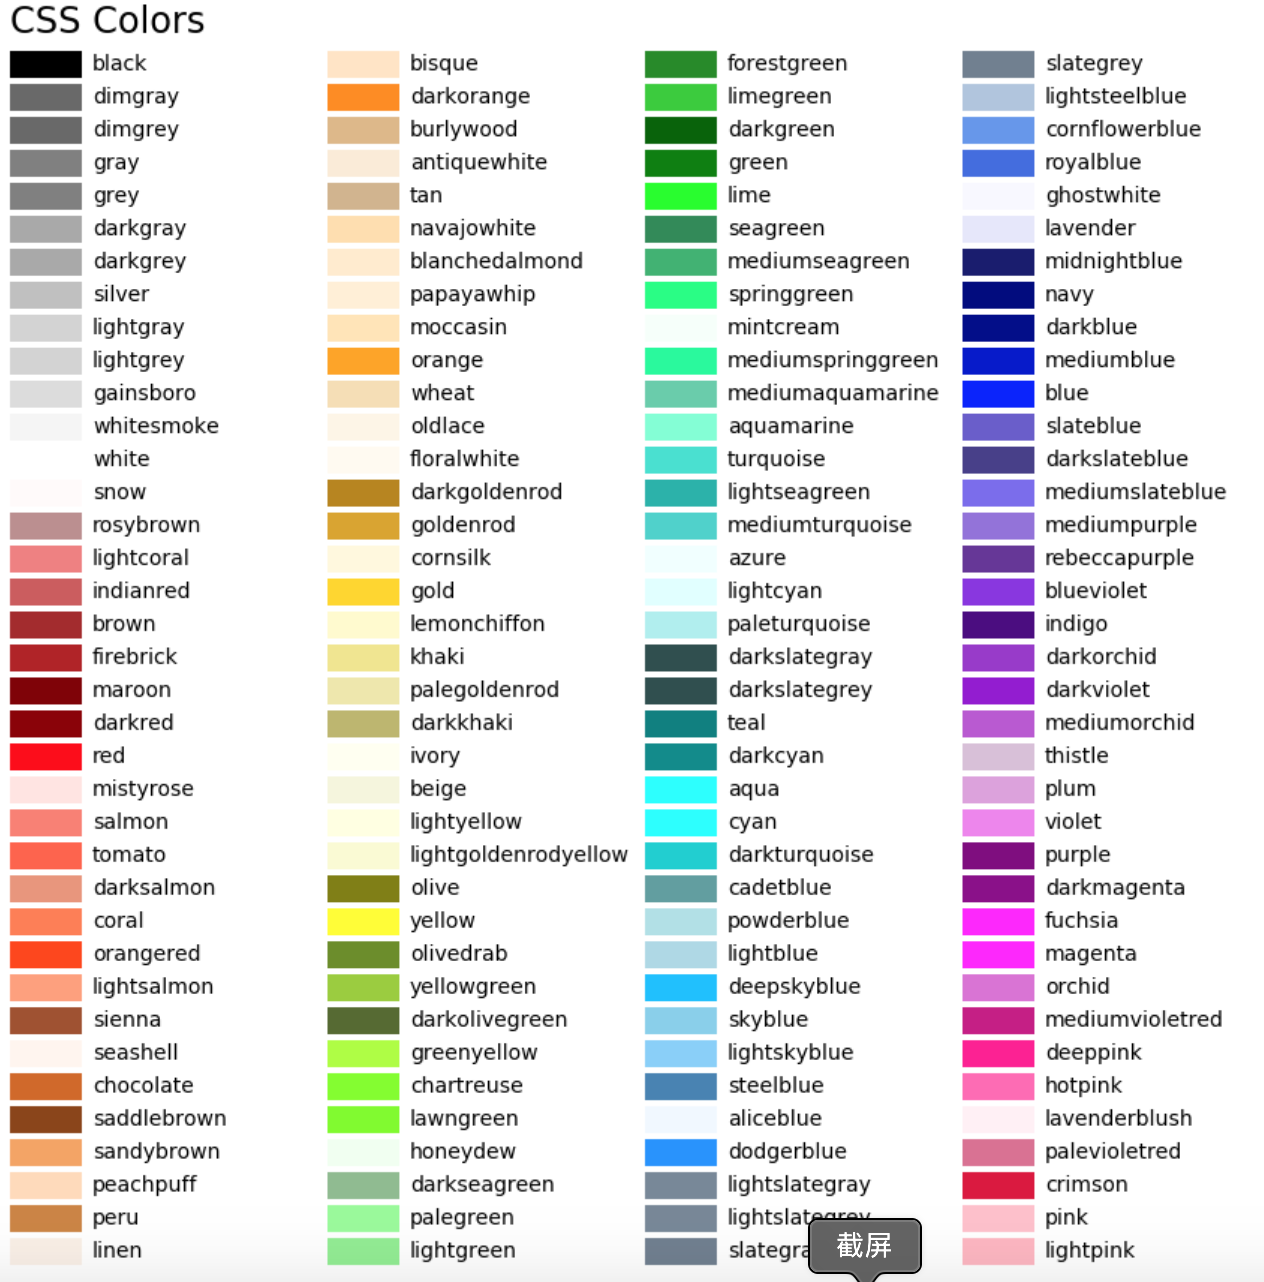

### Tidy Data  
    * 每个变量1列
    * 每个观察1行
    * 每个观察单元是表格

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Bar Chart  
bar chart 描述离散数据的分布/状态。

In [2]:
df_line = pd.read_csv('Equipment_Quality.csv')

In [3]:
df_line.head(3)

,SurveilancePlace,Department,MonitorDate,Rate_Wave
0,D,Suburb,20121001,3.32
1,D,Suburb,20121002,2.84
2,D,Suburb,20121003,2.91


In [4]:
df_line['MonitorDate'] = pd.to_datetime(df_line['MonitorDate'])

In [5]:
df_line.dtypes

SurveilancePlace            object
Department                  object
MonitorDate         datetime64[ns]
Rate_Wave                  float64
dtype: object

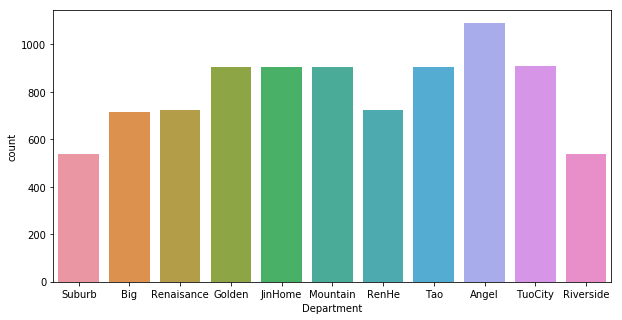

In [6]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = df_line, x='Department');


In [10]:
# 设置颜色
base_color = sns.color_palette()[0]

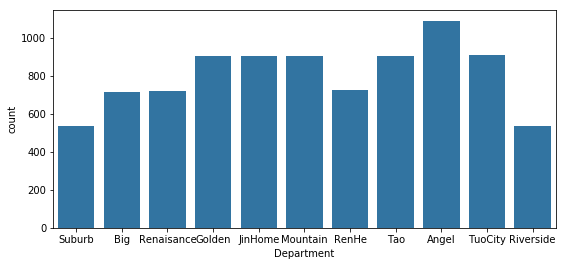

In [11]:
# 设置图像大小
fig, ax = plt.subplots(figsize = (9, 4))

sns.countplot(data = df_line, x='Department', color = base_color);

In [12]:
# 设置顺序, method: .value_counts(ascending = False)
department_order = df_line['Department'].value_counts().index

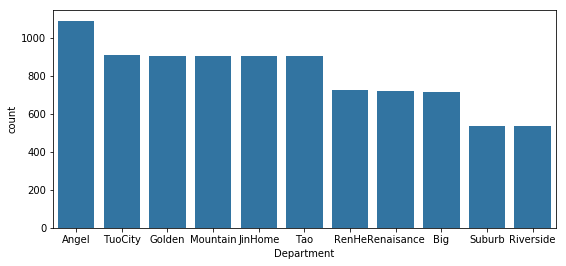

In [13]:
fig, ax = plt.subplots(figsize = (9, 4))

base_color = sns.color_palette()[0]

sns.countplot(data = df_line, x='Department', 
              color = base_color, 
              order = department_order );


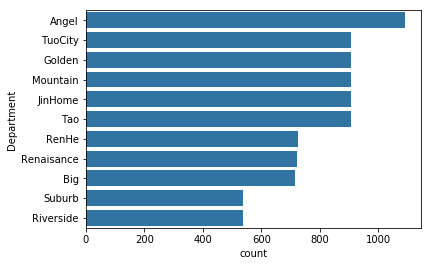

In [14]:
# 在seaborn方式下的绘图，可以用, x/y来设定图的方向
base_color = sns.color_palette()[0]

sns.countplot(data = df_line, y='Department', 
              color = base_color, 
              order = department_order );

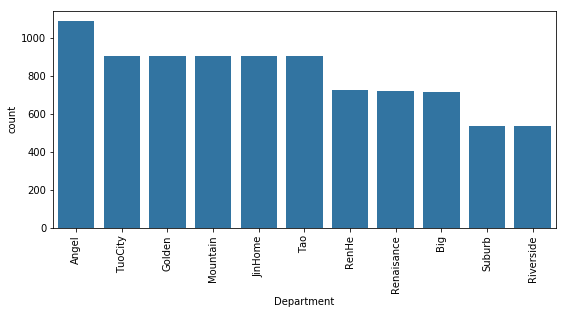

In [15]:
# 进一步的设置， 比如用xticks来控制变量文字的走向
fig, ax = plt.subplots(figsize = (9, 4))

base_color = sns.color_palette()[0]

sns.countplot(data = df_line, x='Department', 
              color = base_color, 
              order = department_order );

plt.xticks(rotation = 90);

### 绝对vs相对频率  
用比例%来表达分布

In [16]:
# 数据量
n_sizes = df_line.shape[0]
# 最高频次
max_count = df_line['Department'].value_counts().max()
# 最高比例
max_prop = max_count/n_sizes

In [17]:
# 设置比例的刻度
tick_props = np.arange(0, max_prop, 0.05)
tick_names = ['{:0.2f}'.format(p) for p in tick_props]

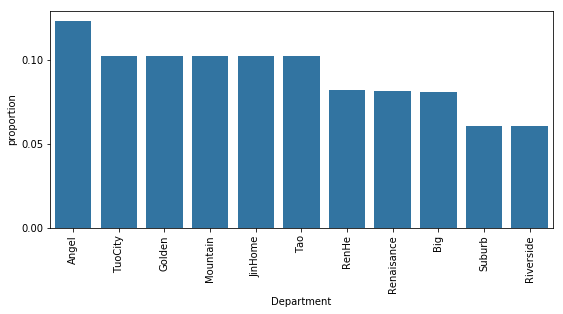

In [18]:
# 再次作图
fig, ax = plt.subplots(figsize = (9, 4))
base_color = sns.color_palette()[0]

sns.countplot(data = df_line, 
              x = 'Department', 
              color = base_color,
             order = department_order);

plt.xticks(rotation = 90);
plt.yticks(tick_props*n_sizes, tick_names);
plt.ylabel('proportion');

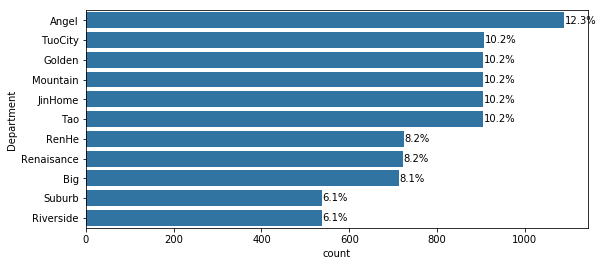

In [19]:
# 在柱子上做标示
fig, ax = plt.subplots(figsize = (9, 4))
base_color = sns.color_palette()[0]

#增加标注
department_counts = df_line['Department'].value_counts()

for i in range(len(department_counts)):
    count = department_counts[i]
    pct_string = '{:0.1f}%'.format(100*count/n_sizes)
    plt.text(count+1, i, pct_string, va = 'center')

sns.countplot(data = df_line, 
              y = 'Department', 
              color = base_color,
              order = department_order);

### 了解数据表的缺失值情况

In [20]:
df_line.isna().sum()

SurveilancePlace    0
Department          0
MonitorDate         0
Rate_Wave           0
dtype: int64

### Pie Charts

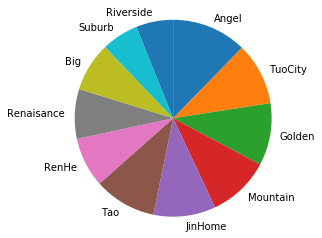

In [21]:
department_counts = df_line['Department'].value_counts()

plt.pie(department_counts, 
        labels = department_counts.index, 
       startangle = 90,
       counterclock = False);
plt.axis('square');

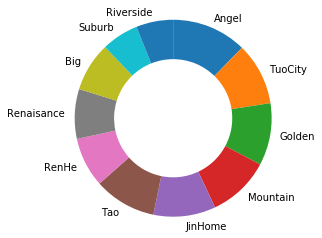

In [22]:
# donut plot
department_counts = df_line['Department'].value_counts()

plt.pie(department_counts, 
        labels = department_counts.index, 
       counterclock = False, 
       wedgeprops = {'width': 0.4},
       startangle = 90);
plt.axis('square');

### Histograms

In [23]:
df_line.columns

Index(['SurveilancePlace', 'Department', 'MonitorDate', 'Rate_Wave'], dtype='object')

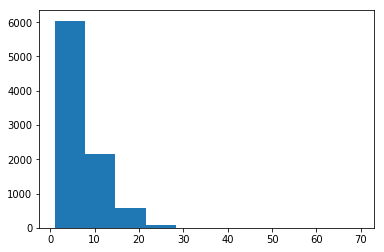

In [24]:
plt.hist(data=df_line, x = 'Rate_Wave');

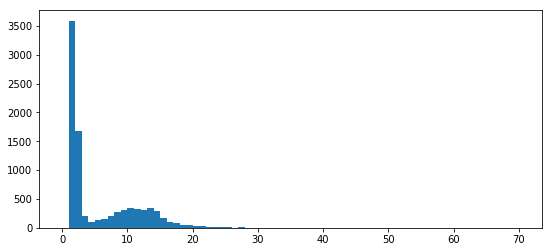

In [25]:
#如何使得直方图显示真实的情况
plt.figure(figsize=[9,4])

bin_edges = np.arange(0, df_line['Rate_Wave'].max()+1, 1)

plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);

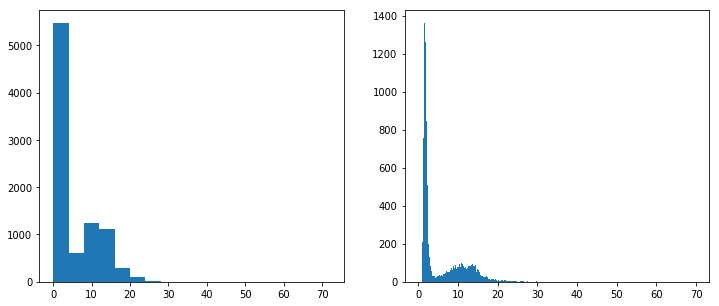

In [26]:
plt.figure(figsize=[12,5])

plt.subplot(1,2, 1)
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+4, 4)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);

plt.subplot(1,2, 2)
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+1/4, 1/4)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);


### 另一个画直方图的方法， seaborn

/Users/RichardZhou/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


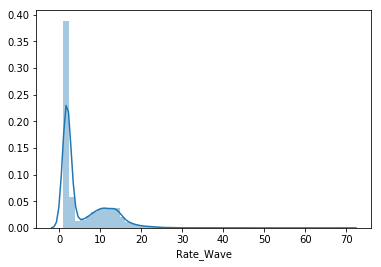

In [27]:
# 用seaborn的distplot()函数
sns.distplot(df_line['Rate_Wave']);

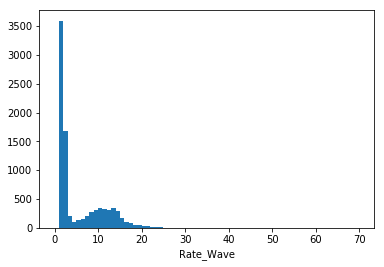

In [28]:
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+1, 1)
sns.distplot(df_line['Rate_Wave'], 
             bins = bin_edges, 
             kde = False,
            hist_kws = {'alpha': 1});
# alpha(transparency) : RGBA value: 0-1

### 描述性统计，异常值和轴区间

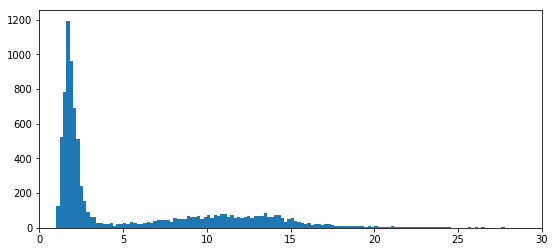

In [29]:
# 设定X轴的区间
plt.figure(figsize=[9,4])
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+0.2, 0.2)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);
plt.xlim((0, 30));

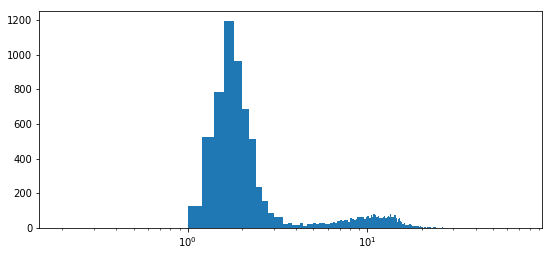

In [30]:
# log转换
plt.figure(figsize=[9,4])
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+0.2, 0.2)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);
plt.xscale('log');

In [ ]:
plt.figure(figsize=[9,4])
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+0.2, 0.2)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);
plt.xscale('log');


### 图形， 坐标和子图

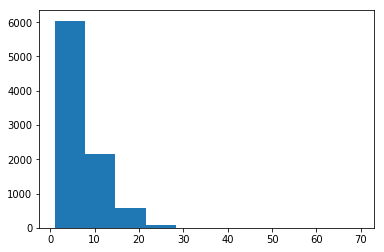

In [10]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = df_line, x = 'Rate_Wave');

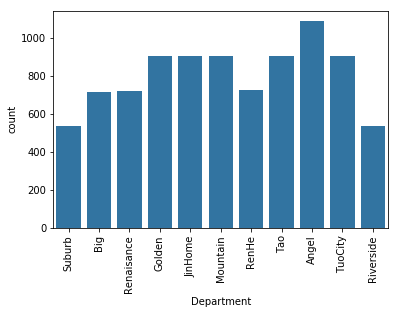

In [13]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
base_color = sns.color_palette()[0]
sns.countplot(data = df_line, x = 'Department', color = base_color);
plt.xticks(rotation = 90);

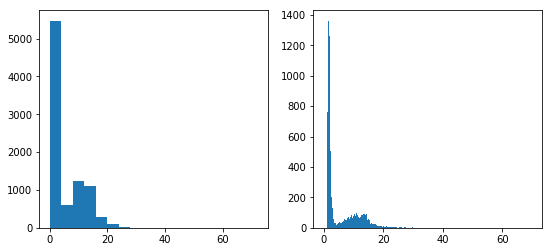

In [15]:
# 另一个例子
plt.figure(figsize = [9, 4])

plt.subplot(1, 2, 1) # 1 row, 2 cols, subplot 1
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+4, 4)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);

plt.subplot(1, 2, 2) # 1 row, 2 cols, subplot 2
bin_edges = np.arange(0, df_line['Rate_Wave'].max()+1/4, 1/4)
plt.hist(data = df_line, x = 'Rate_Wave', bins = bin_edges);


### rwidth

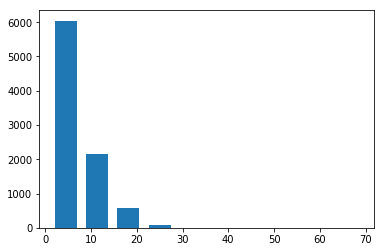

In [18]:
fig = plt.figure()
ax = fig.add_axes([.125, .125, .775, .755])
ax.hist(data = df_line, x = 'Rate_Wave', rwidth = 0.7);# 留30%空隙

# Area Chart

In [1]:
# library
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# create data
x=range(1,15)
y=[1,4,6,8,4,5,3,2,4,1,5,6,8,7]

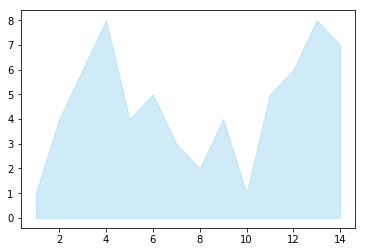

In [3]:
# Change the color and its transparency
plt.fill_between( x, y, color="skyblue", alpha=0.4)
plt.show()

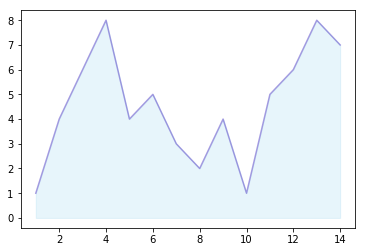

In [4]:
# Same, but add a stronger line on top (edge)
plt.fill_between( x, y, color="skyblue", alpha=0.2)
plt.plot(x, y, color="Slateblue", alpha=0.6)